# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Extracting Data

In [2]:
data=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Let's see columns of data

In [4]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

We can see the shape of data

In [5]:
data.shape

(159, 7)

As we see there are 159 observations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


describe hepls us to see mean,count,std,min,max and percentages

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Let's see missing values 

In [8]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

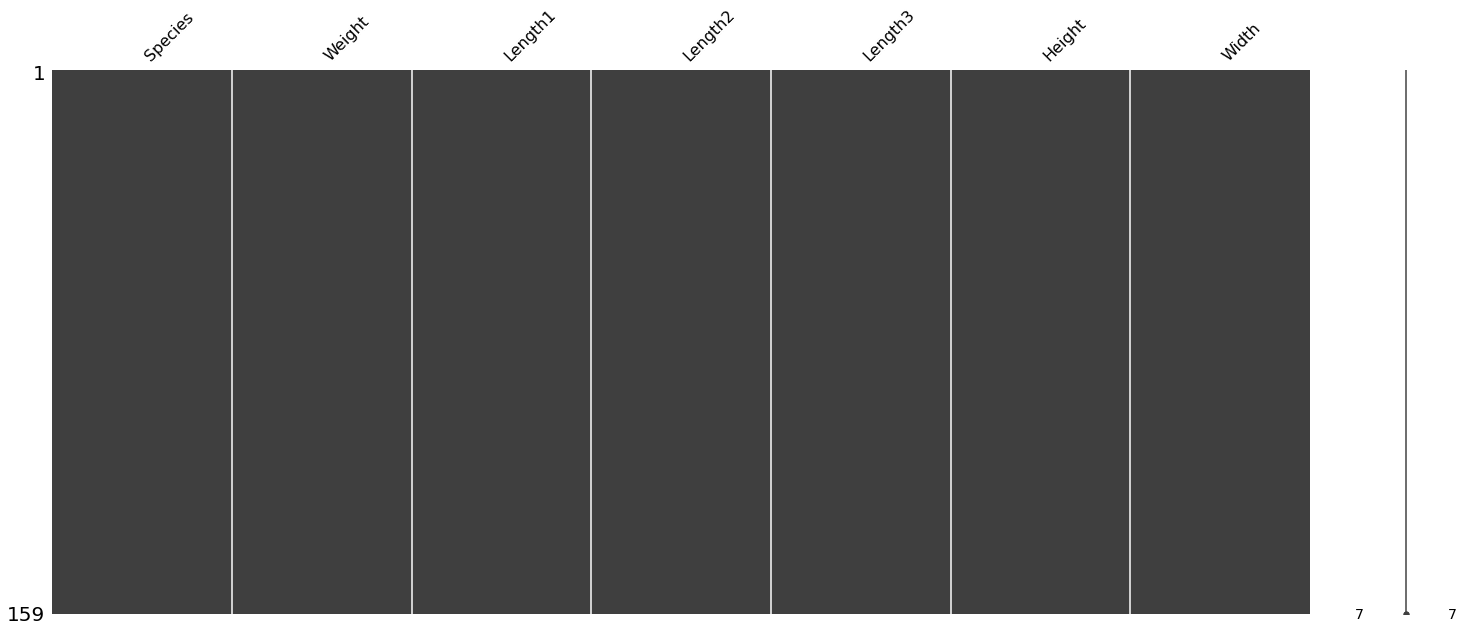

In [9]:
msn.matrix(data)
plt.show()

As we see there are no null values

# Data visualization

Let's see 'Species' column  values

In [10]:
Species=data['Species'].value_counts()

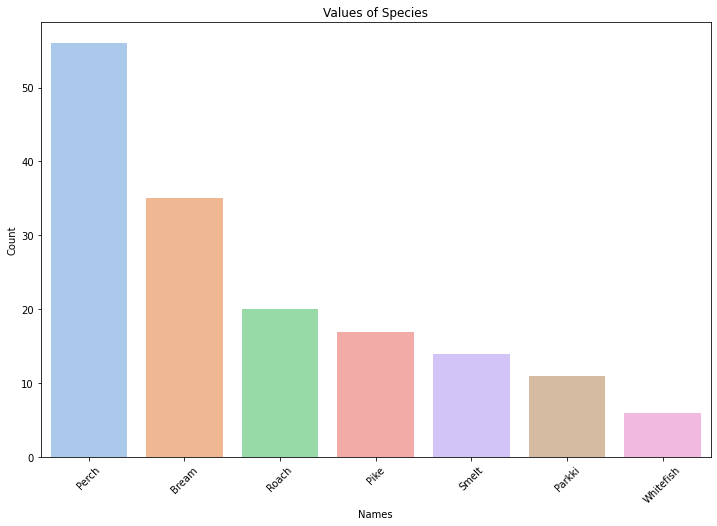

In [11]:
sns.set_palette('pastel')
plt.figure(figsize=(12, 8))
sns.barplot(x=Species.index, y=Species.values)
plt.title('Values of Species')
plt.xlabel('Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let's create pie chart using matplotlib to see the percentage of species

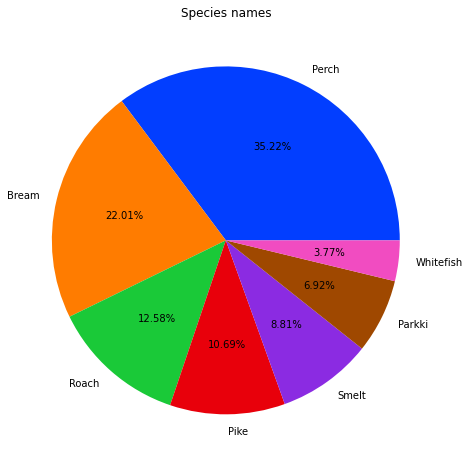

In [12]:
sns.set_palette('bright')
plt.figure(figsize=(12, 8))
plt.pie(Species.values, labels=Species.index, autopct='%1.2f%%')
plt.title('Species names')
plt.show()

We can see how many unique values column have

In [13]:
data['Weight'].unique()

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4,   19.7,   19.9])

Let's see the relationship between the features

# Correlation Analysis

In [14]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Let's visualize 

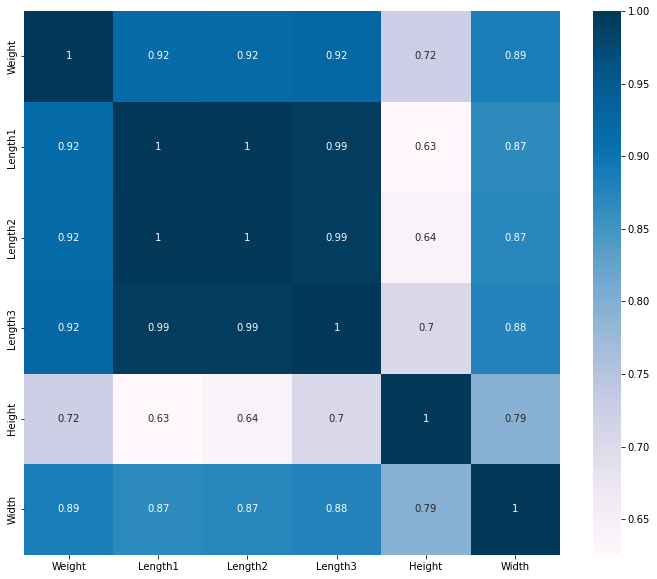

In [15]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap =plt.cm.PuBu)

This is also how we can see the visualization of correlation analysis

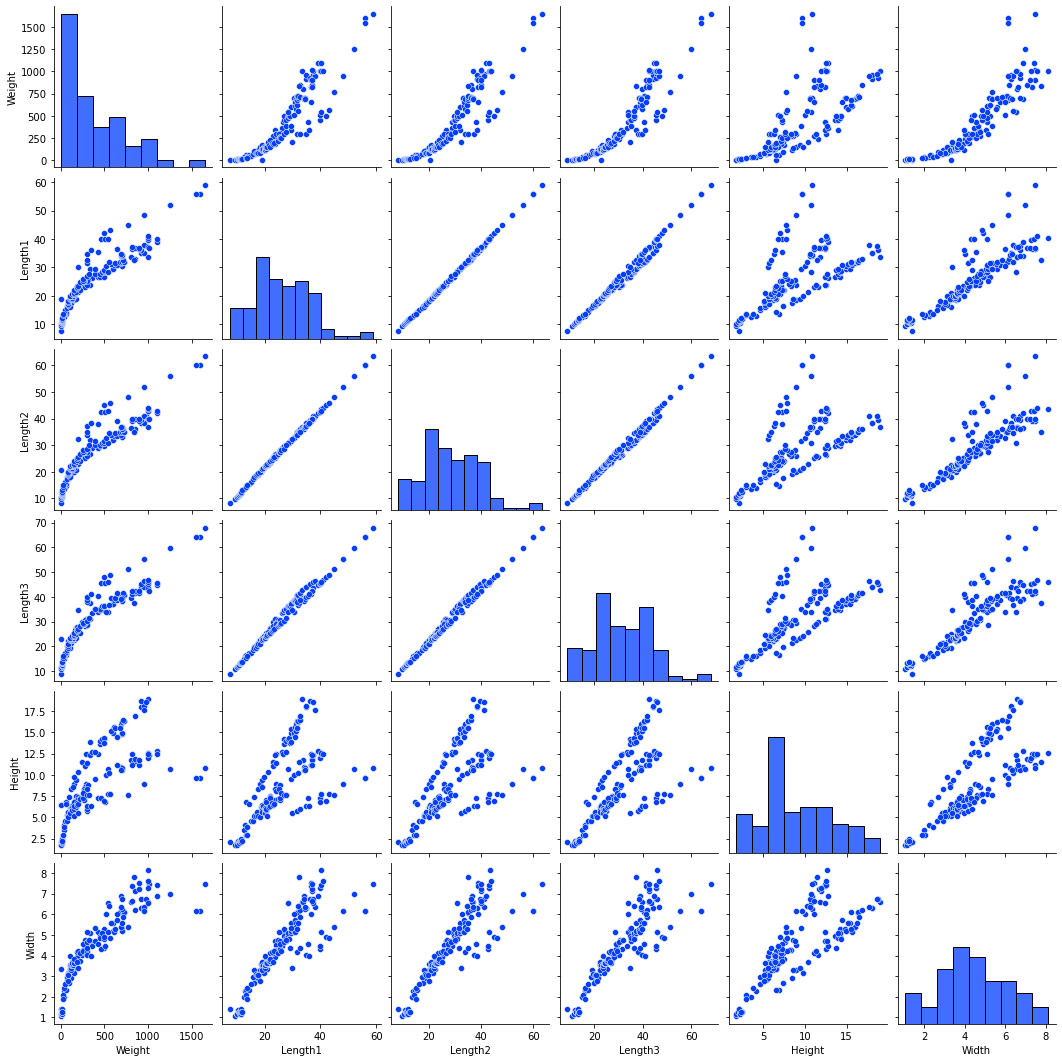

In [16]:
sns.pairplot(data, kind='scatter')
plt.show()

Let's get numeric data , write function & use scatterplot 

In [17]:
numeric_columns=data._get_numeric_data().columns

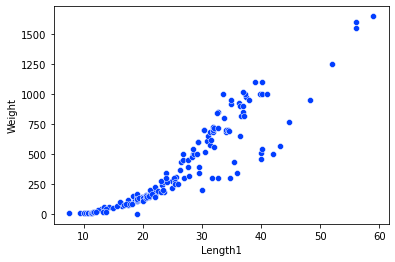

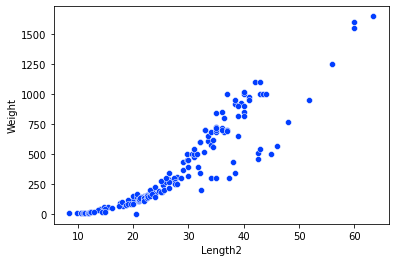

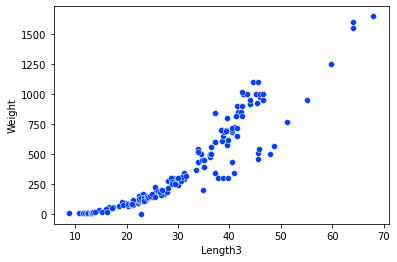

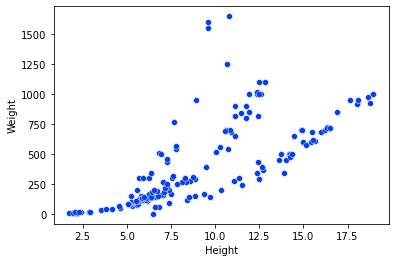

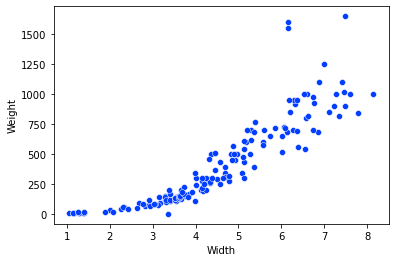

In [18]:
for col in numeric_columns:
    if col!='Weight':
      sns.scatterplot(x=col,y='Weight',data=data)
    plt.show()

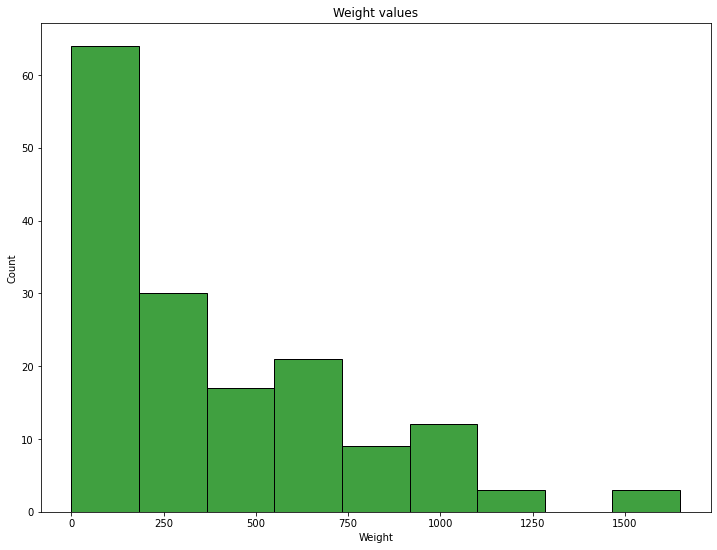

In [19]:
plt.figure(figsize=(12,9))
sns.histplot(data.Weight,color='green')
plt.title('Weight values')
plt.show()

we can visualize Length of species, you can see Pike fish has max length

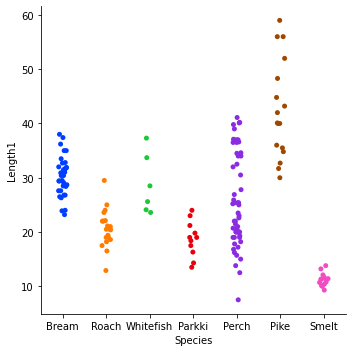

In [22]:
sns.catplot('Species','Length1',data=data)
plt.show()

In [23]:
print('Max length of fish:',data['Length1'].max())
print('Min length of fish:',data['Length1'].min())
print('Average length of fish:',data['Length1'].mean())

Max length of fish: 59.0
Min length of fish: 7.5
Average length of fish: 26.24716981132075


# Outliers

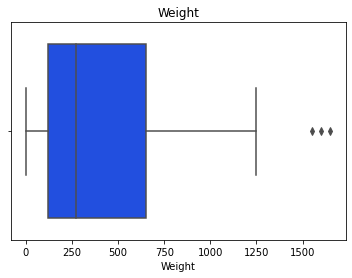

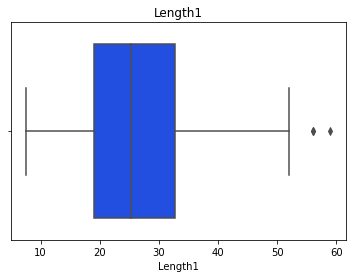

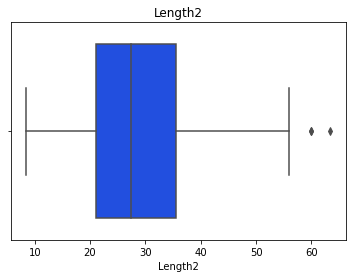

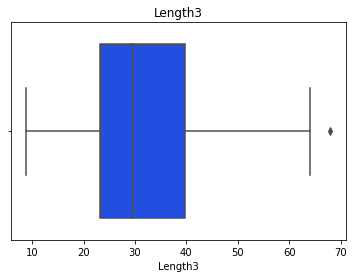

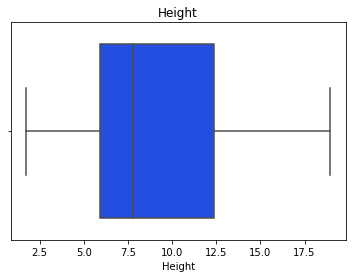

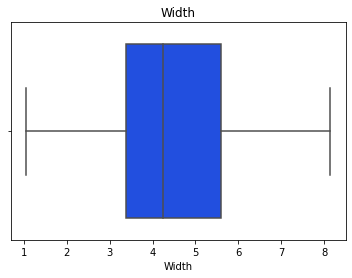

In [24]:
for col in numeric_columns:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show()

In [25]:
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [26]:
for col in numeric_columns:
    print('#'*20, col)
    print(outliers(data, col))

#################### Weight
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length1
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length2
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length3
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
#################

In [27]:
data.loc[142:144, :]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [28]:
data.drop([142, 143, 144], inplace=True)

In [29]:
data.shape

(156, 7)

As we see data shape is reduced (we deleted 3 columns)

We can rename columns like that

In [30]:
data.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
data.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Linear regression

In [31]:

lr= smf.ols(formula='Weight ~ LengthVer', data=data).fit()

lr.params

Intercept   -430.023483
LengthVer     31.386344
dtype: float64

In [32]:
y = data['Weight']
X = data.iloc[:,2:7]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [35]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  -415.3140586548066
Model coefficients:  [125.13612869 -53.46852609 -49.30407553  39.20563937  53.0058332 ]


In [37]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [38]:
print(f'Train error: {r2_score(y_train, y_train_pred)}')
print(f'Test error: {r2_score(y_test, y_test_pred)}')

Train error: 0.9055751050309181
Test error: 0.8867783829678579


In [39]:
cross_val_score_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print(np.mean(cross_val_score_train))

0.8625607353515635


In [40]:
y_pred = lr.predict(X_test)

In [41]:
lr.score(X_test, y_test)

0.8867783829678579

Let's visualize

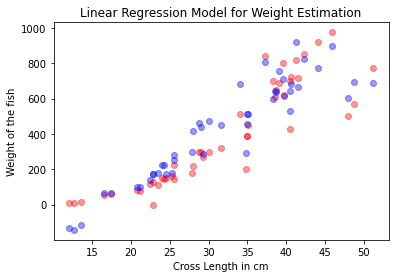

In [42]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

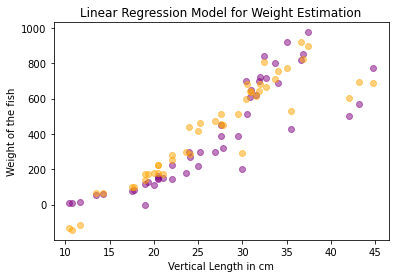

In [43]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

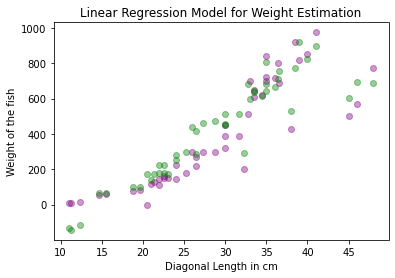

In [44]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

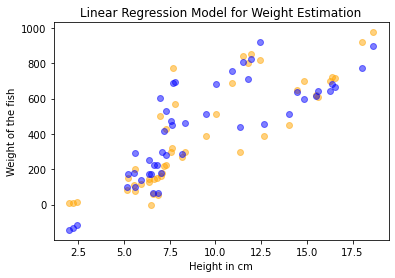

In [45]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

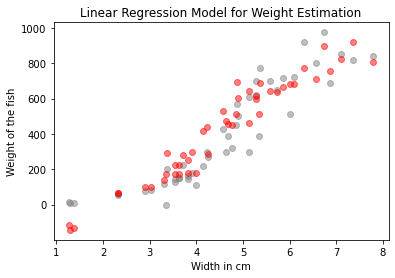

In [46]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

We see that there is a relationship between columns.